x: 
 [1 2 3]
f(x) = x**2: 
 [1 4 9]
f'(x) = 2x: 
 [2 4 6]


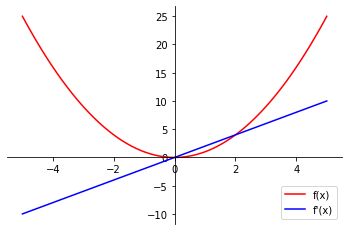

math.sqrt for 18: 4.242640687119285
sympy.sqrt for 18: 3*sqrt(2)
numerical evaluation for sympy.sqrt: 4.243
my equation:
   2      
2⋅x  - x⋅y

equation manipulation
  ⎛ 3      2⎞
x⋅⎝x  + 2⋅x ⎠

expand the expression:
 4      3
x  + 2⋅x 

factorise:
 3        
x ⋅(x + 2)

x^2 evaluation with x=3:
9.00000000000000

evaluation of symbolic function over an array->
x: 
 [1 2 3]
f(x) = x**2: 
 [1 4 9]

 derivative of x^3:
   2
3⋅x 


In [51]:
"""
Differentiation in Python: Symbolic, Numerical and Automatic
"""

import numpy as np
import matplotlib.pyplot as plt

# Output of plotting commands is displayed inline within the Jupyter notebook.
%matplotlib inline

# FUNCTIONS IN PYTHON
def f(x):
    return x**2
def dfdx(x):
    return 2*x
def plot_f1_and_f2(f1, f2=None, x_min=-5, x_max=5, label1="f(x)", label2="f'(x)"):
    x = np.linspace(x_min, x_max,100)

    # Setting the axes at the centre.
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    plt.plot(x, f1(x), 'r', label=label1)
    if not f2 is None:
        # If f2 is an array, it is passed as it is to be plotted as unlinked points.
        # If f2 is a function, f2(x) needs to be passed to plot it.
        if isinstance(f2, np.ndarray):
            plt.plot(x, f2, 'bo', markersize=3, label=label2,)
        else:
            plt.plot(x, f2(x), 'b', label=label2)
    plt.legend()

    plt.show()

x_array = np.array([1, 2, 3])

print("x: \n", x_array)
print("f(x) = x**2: \n", f(x_array))
print("f'(x) = 2x: \n", dfdx(x_array))

plot_f1_and_f2(f, dfdx)

# 2 SYMBOLIC DIFFERENTIATION
# 2.1 - Introduction to Symbolic Computation with SymPy
import math
# This format of module import allows to use the sympy functions without sympy. prefix.
from sympy import *

print(f"math.sqrt for 18: {math.sqrt(18)}")
# This is actually sympy.sqrt function, but sympy. prefix is omitted.
print(f"sympy.sqrt for 18: {sqrt(18)}")
print(f"numerical evaluation for sympy.sqrt: {N(sqrt(18),4)}")

# List of symbols.
x, y = symbols('x y')
# Definition of the expression.
expr = 2 * x**2 - x * y
print("my equation:")
pprint(expr)

print("\nequation manipulation")
expr_manip = x * (expr + x * y + x**3)
pprint(expr_manip)
print("\nexpand the expression:")
pprint(expand(expr_manip))
print("\nfactorise:")
pprint(factor(expr_manip))

f_symb = x ** 2
print("\nx^2 evaluation with x=3:")
pprint(f_symb.evalf(subs={x:3}))

from sympy.utilities.lambdify import lambdify #to make a function NumPy-friendly
f_symb_numpy = lambdify(x, f_symb, 'numpy')
print("\nevaluation of symbolic function over an array->")
print("x: \n", x_array)
print("f(x) = x**2: \n", f_symb_numpy(x_array))

# 2.2 - Symbolic Differentiation with SymPy
print("\n derivative of x^3:")
pprint(diff(x**3,x))

